In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [45]:
dataset = pd.read_csv("Data/Customers.csv")
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [46]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [47]:
dataset.shape

(200, 5)

In [48]:
df = dataset.set_index('CustomerID')
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [49]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [68]:
x = dataset[['Age','Annual Income (k$)']]
y = dataset['Spending Score (1-100)']

In [69]:
x

,Age,Annual Income (k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17
...,...,...
195,35,120
196,45,126
197,32,126
198,32,137


In [70]:
y

0      39
1      81
2       6
3      77
4      40
       ..
195    79
196    28
197    74
198    18
199    83
Name: Spending Score (1-100), Length: 200, dtype: int64

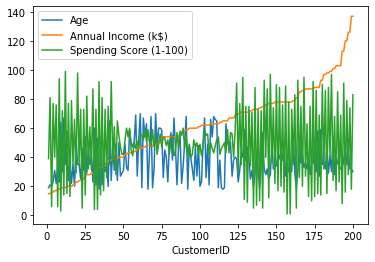

In [71]:
df.plot()
plt.show()

In [72]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [73]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(x, y)

LinearRegression()

In [79]:
coeff_df = pd.DataFrame(regr.coef_, x.columns, columns=['Coefficient'])
coeff_df


,Coefficient
Age,-0.604787
Annual Income (k$),0.005749


In [81]:
y_pred = regr.predict(x_test)


In [82]:
y_pred

array([42.03113167, 49.65648656, 41.05149953, 44.66872596, 57.52446947,
       46.09099716, 60.14025806, 44.7607029 , 38.38516245, 47.18560049,
       62.12132805, 55.00184637, 51.52833393, 45.37123872, 39.18540072,
       59.54121936, 62.65138403, 45.33099881, 55.3996855 , 37.97582621,
       56.37238055, 56.85644806, 59.05715184, 55.65262211, 31.27717789,
       50.15779975, 52.7149142 , 55.77334185, 49.55301249, 43.9374704 ,
       52.30101794, 45.17003915, 47.79038775, 62.21905355, 45.67135234,
       52.16761254, 50.77408413, 54.69717273, 45.83806056, 33.79405243])

In [83]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
18,29,42.031132
170,13,49.656487
107,46,41.051500
98,42,44.668726
177,69,57.524469
182,15,46.090997
5,76,60.140258
146,36,44.760703
12,15,38.385162
152,20,47.185600


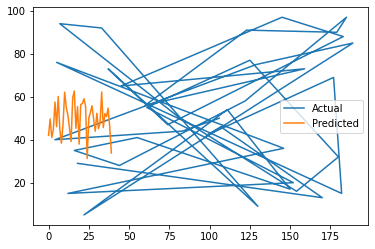

In [87]:
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

In [84]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 21.1533268508015
Mean Squared Error: 592.7921308045192
Root Mean Squared Error: 24.347322867299376
